In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('Figuras/screw_u8.bmp', cv2.IMREAD_GRAYSCALE)
def resize_img(img, scale):
    (h, w) = img.shape

    TH_01 = np.array([[scale, 0, 0],
                    [0, scale, 0],
                    [0, 0, 1]], dtype=np.float32)

    TH_10 = np.linalg.inv(TH_01)

    img_out = np.ones((h, w), dtype = np.uint8) * 255

    for u in range(w):
        for v in range(h):

            p1 = np.array([ [u], [v], [1] ])
            p0 = np.matmul(TH_10, p1)

            x = int(p0[0])
            y = int(p0[1])

            if x >= 0 and x < w and y >= 0 and y < h:
                img_out[v, u] = img[y, x]


    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_out, cmap='gray')
    plt.title('Transformada')
    plt.axis('off')


C:\Users\lucca\AppData\Local\Temp\ipykernel_3884\2999400066.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = int(p0[0])
C:\Users\lucca\AppData\Local\Temp\ipykernel_3884\2999400066.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = int(p0[1])


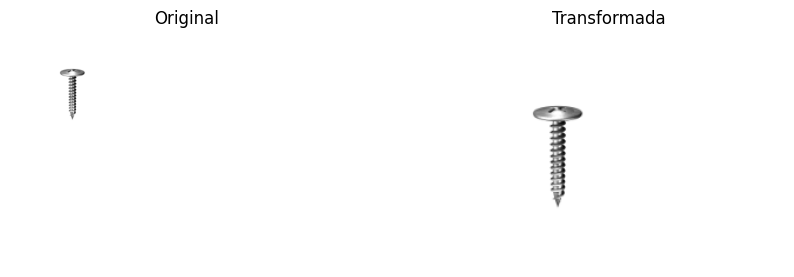

In [9]:
img_resized = resize_img(img, 2)

C:\Users\lucca\AppData\Local\Temp\ipykernel_3884\423670152.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = int(p0[0])
C:\Users\lucca\AppData\Local\Temp\ipykernel_3884\423670152.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = int(p0[1])


(np.float64(-0.5), np.float64(349.5), np.float64(262.5), np.float64(-0.5))

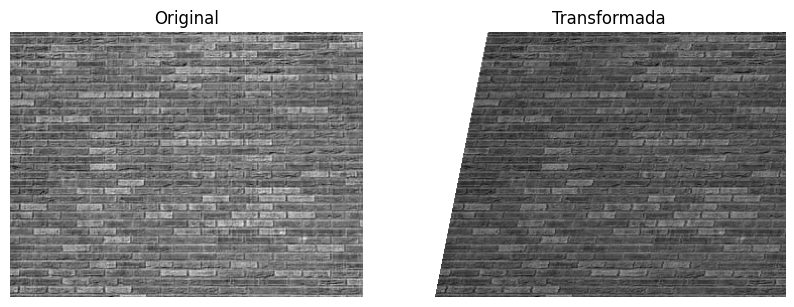

In [11]:
img2 = cv2.imread('Figuras/Brick_U8.bmp', cv2.IMREAD_GRAYSCALE)
    
    
(h, w) = img2.shape
TH_01 = np.array([[1, -0.2, 55],
                [0, 1, 0],
                [0, 0, 1]], dtype=np.float32)
TH_10 = np.linalg.inv(TH_01)
img_out = np.ones((h, w), dtype = np.uint8) * 255
for u in range(w):
    for v in range(h):
        p1 = np.array([ [u], [v], [1] ])
        p0 = np.matmul(TH_10, p1)
        x = int(p0[0])
        y = int(p0[1])
        if x >= 0 and x < w and y >= 0 and y < h:
            img_out[v, u] = img2[y, x]

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_out, cmap='gray')
plt.title('Transformada')
plt.axis('off')

In [16]:

def img_perspective(img, matrix):
    (h, w) = img.shape

    TH_01 = np.array(matrix, dtype=np.float32)
    TH_10 = np.linalg.inv(TH_01)

    img_out = np.ones((h, w), dtype = np.uint8) * 255

    for u in range(w):
        for v in range(h):

            p1 = np.array([ [u], [v], [1] ])
            p0 = np.matmul(TH_10, p1)

            x = int(p0[0][0]/p0[2][0])
            y = int(p0[1][0]/p0[2][0])

            if x >= 0 and x < w and y >= 0 and y < h:
                img_out[v, u] = img[y, x]

    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_out, cmap='gray')
    plt.title('Transformada')
    plt.axis('off')


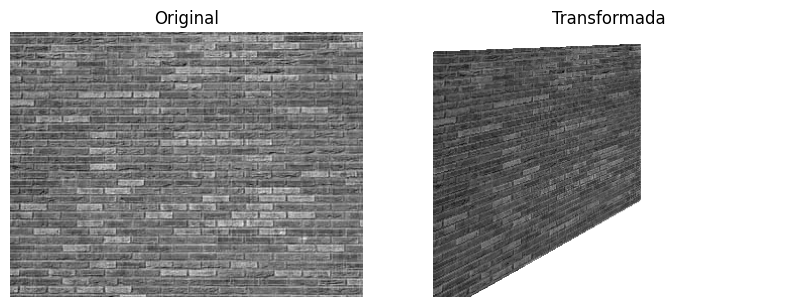

In [17]:
img_perspective(img2, [[1,0,0],[0,1,20],[0.002,0,1]])

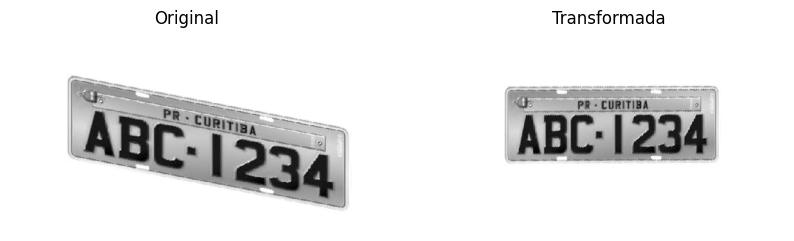

In [18]:
img3 = cv2.imread('Figuras/Placa_u8.bmp', cv2.IMREAD_GRAYSCALE)

img_perspective(img3, [[0.76, 0, 48.97],
                       [-0.18, 0.92, 45.03],
                       [0, 0, 1]])